<div align='left' style="width:400px;height:120px;overflow:hidden;">
<a href='http://www.uff.br'>
<img align='left' style='display: block;height: 92%' src='imgs/UFF.png' alt='UFF logo' title='UFF logo'/>
</a>
<a href='http://www.ic.uff.br'>
<img align='left' style='display: block;height: 100%' src='imgs/logo-ic.png' alt='IC logo' title='IC logo'/>
</a>
</div>

# Machine Learning: Linear Regression

### [Luis Martí](http://lmarti.com)
#### [Instituto de Computação](http://www.ic.uff)
#### [Universidade Federal Fluminense](http://www.uff.br)
#### [`http://lmarti.com/2016-1-ml`](http://lmarti.com/2016-1-ml)

### About the notebook/slides

* The slides are _programmed_ as a [Jupyter](http://jupyter.org)/[IPython](https://ipython.org/) notebook.
* **Feel free to try them and experiment on your own by launching the notebooks.**

* You can run the notebook online: [![Binder](http://mybinder.org/badge.svg)](http://mybinder.org/repo/lmarti/machine-learning)

If you are using [nbviewer](http://nbviewer.jupyter.org) you can change to slides mode by clicking on the icon:

<div class="container-fluid">
  <div class="row">
      <div class="col-md-3"><span/></div>
      <div class="col-md-6">
      <div class='well well-sm'>
              <img src='imgs/view-as-slides.png'/>
      </div>
      </div>
      <div class="col-md-3" align='center'><span/></div>
  </div>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random, math
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Fixed seed to make the results repeatable
random.seed(0)
# Pretty matrix outputs
np.set_printoptions(precision=3, threshold=1000, edgeitems=5, linewidth=80, suppress=True)

# Regression$\renewcommand{\vec}[1]{\boldsymbol{#1}}$

* We are already familiar with regression problems.
* We have a dataset $\Psi=\left\{\left<\vec{x}^{(1)},\vec{y}^{(1)}\right>,\ldots,\left<\vec{x}^{(i)},\vec{y}^{(i)}\right>,\ldots\right\}$ of **noisy samples** drawn from and **unknown** function $\mathbf{F}:\mathcal{D}\rightarrow\mathcal{I}$.
* In the regression case $\mathcal{D}\subseteq\mathbb{R}^n$ and $\mathcal{I}\subseteq\mathbb{R}^m$.

We can assume that $m=1$ and noise is Gaussian.

### Gaussian Noise: Model Assumption 
We will *assume* that the target variable is described by
    $$y = \mathbf{F}(\vec{x},\vec{w}) + \epsilon$$
where $\mathbf{F}(\vec{x},\vec{w})$ is an as of yet undefined function of $\vec{x}$ and $\vec{w}$ and $\epsilon$ is a **Gaussian** distributed noise component. 

#### Gaussian Noise? 

The derivations provided below all assume Gaussian noise on the target data. Is this a good assumption? In many cases yes. The argument hinges
on the use of the [Central_Limit_Theorem](http://en.wikipedia.org/wiki/Central_limit_theorem) that basically says the the **sum** of many independent random variables behaves behaves like a Gaussian distributed random variable. 

The _noise_ term in this model, $\epsilon$, can be thought of as the sum of features not included in the model function, $\mathbf{F}(\vec{x},\vec{w})$. Assuming these features are themselves independent random variables then the Central Limit Theorom suggests a Gaussian model is appropriate, assuming there are many independent unaccounted for features. 

It is possible that there is only a small number of unaccounted for features or that there is genuine *non-Gaussian* noise in our observation measurements, e.g. sensor shot noise that often has a Poisson distribution. In such cases, the assumption is no longer valid.

## An Example

Training dataset

In [2]:
N = 5                                              # Size of the data set
X = np.array([[0.0], [1.0], [2.0], [3.0], [4.0]])  # Inputs, shape: N x 1
y = np.array([10.5, 5.0, 3.0, 2.5, 1.0])           # Outputs, shape: N

In [3]:
print(X.T)
print(y)

[[ 0.  1.  2.  3.  4.]]
[ 10.5   5.    3.    2.5   1. ]


Test dataset

In [4]:
N_test = 100
X_test = np.linspace(0.0, 4.0, N_test).reshape((N_test, 1))
y_test = np.linspace(7.0, -5.0, N_test) + 2*np.random.randn(N_test)

The training and test datasets

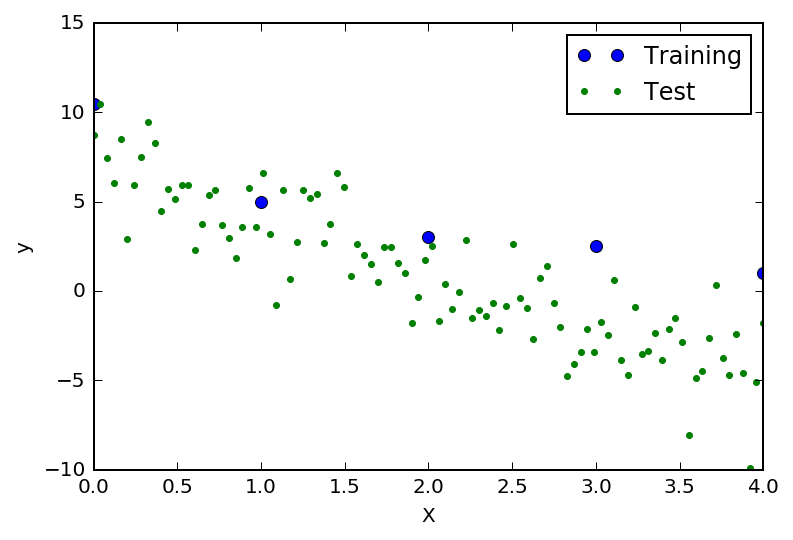

In [5]:
plt.plot(X[:, 0], y, 'bo', label='Training')
plt.plot(X_test[:, 0], y_test, "g.", label='Test')
plt.xlabel('X'); plt.ylabel('y'); plt.legend();

# Linear Regression Model

* We can express our constraints down with a **linear** model: 
$$y^{(i)} + \epsilon^{(i)} =  \vec{x}^{(i)}\cdot \vec{w} + b, \forall i \in \{1,\ldots,N\}$$ 
where $\boldsymbol{w}$ and $b$ constitute a weight vector and $\epsilon^{(n)} \sim \mathcal{N}(0, \sigma^2)$.

* Weights are parameters of the linear model that can be tuned to fit the training data better.

* A shorter version of this expression is the following equation:
$$\vec{y} + \vec{\epsilon} = \vec{X} \cdot \vec{w}, \quad \vec{X} \in \mathbb{R}^{N \times n}, \vec{y} \in \mathbb{R}^N, \vec{\epsilon} \in \mathbb{R}^N, \vec{w} \in \mathbb{R}^n,$$
where the $i$-th **row** of $\vec{X}$ represents $\vec{x}^{(i)}$ and the $i$-th entry of the vector $\vec{y}$ represents $\vec{y}^{(i)}$.


* It might not be possible to find a weight vector that satisfies the constraints perfectly.
* Instead, we can minimize the sum of squared errors (SSE): 
$$\hat{\boldsymbol{w}} = \text{argmin}_\boldsymbol{w} \dfrac{1}{2}\left\|\boldsymbol{X}\boldsymbol{w} - \boldsymbol{y}\right\|^2_2,$$ 
where $\left\|\boldsymbol{A}\right\|_2$ is called [Frobenius norm](http://en.wikipedia.org/wiki/Matrix_norm#Frobenius_norm) and is the generalization of the Euclidean norm for matrices.

The *frequentist* (*maximum likelihood*) approach

* assumes that we first obtain observation training data, $\vec{y}$, and that the *best*  value of $\vec{w}$, is that which maximizes the likelihood function, $p(\vec{y}|\vec{x},\vec{w})$.

Under the Gaussian noise condition it can be shown that the maximum likelihood function for the training data is
$$
\begin{array}{rl}
p(\vec{y}|\vec{X},\vec{w},\sigma^2) & = \prod_{i=1}^N \mathcal{ND}(y^{(i)}|\vec{w}^\intercal\phi(\vec{x}^{(i)}),\sigma^2) \\
& =\frac{N}{2}\ln\left(\frac{1}{\sigma^2}\right) -\frac{N}{2}\ln(2\pi) - \frac{1}{2\sigma^2}\sum_{i=1}^N\{t_n -\vec{w}^\intercal\phi(\vec{x}^{(i)})\}^2
\end{array}
$$ where $\vec{X}=\{\vec{x}^{(1)},\ldots,\vec{x}^{(N)}\}$ is the input value set for the corresponding $N$ oberved output values contained in the vector $\mathbf{t}$, and $\mathcal{ND}(\mu,\sigma^2)$ is the Normal Distribution (Gaussian).

**Note:** I used $\mathcal{ND}$ instead of the standard $\mathcal{N}$ to avoid confusion with the product limit, $N$.
    
Taking the logarithm of the maximum likelihood and setting the derivative with respect to $\vec{w}$ equal to zero, one can obtain the maximum likelikhood parameters given by the **normal equations**:
$$\vec{w}_\text{ML} = \left(\vec{\Phi}^\intercal\vec{\Phi}\right)^{-1}\vec{\Phi}^\intercal\vec{y},$$ 
where $\vec{\Phi}$ is the $N \times M$ *design matrix* with elements $\Phi_{i,j}=\phi_j(\vec{x}^{(i)})$, and $\vec{y}$ is the $N \times K$
matrix of training set target values (for $K=1$, it is simply a column vector). 

Note that $\vec{\Phi}^\intercal$ is a $M \times N$ matrix, so that $\vec{w}_{ML}=\left(\vec{\Phi}^intercal\vec{\Phi}\right)^{-1}\vec{\Phi}^\intercal\vec{y}$ is $(M \times N)\times(N \times M)\times(M\times N)\times(N \times K) = M \times K$, where $M$ is the number of free parameters and $K$ is the number of predicted 
target values for a given input.

Note that the only term in the likelihood function that depends on $\vec{w}$ is the last term. Thus, maximizing the likelihood function with respect to $\vec{w}$ *under the assumption of Gaussian noise* is equivalent to minimizing a 
sum-of-squares error function.

## Learning Weights

There are two ways to adjust the weights of a linear model (which includes linear models with nonlinear features):

* **Normal equations** (analytical solution), requires inversion of $n \times n$ matrix.
    * It does not scale well with the number of features
* **Gradient descent** (iterative solution), requires the calculation of $N$ gradients in each step.
    * It does not scale well with the number of examples.

In addition, we can add a constraint to the objective function to penalize large weights: **Tikhonov regularization** (forward pointer).

## Normal Equations

* Frequently solving the equation $\boldsymbol{X} \cdot \boldsymbol{w} = \boldsymbol{y}$ directly for $\boldsymbol{w}$ by inversion is not possible.
    * $\boldsymbol{X}$ is not necessarily a square matrix, therefore $\boldsymbol{w} = \boldsymbol{X}^{-1} \boldsymbol{y}$ is usually not possible. 

* It is usually not possible to find an exact solution. 
    * Instead, we find the [least squares](http://en.wikipedia.org/wiki/Linear_least_squares_%28mathematics%29) solution, which is the solution of $$\vec{X}^\intercal\vec{X} \hat{\boldsymbol{w}} = \vec{X}^\intercal\vec{y}$$ for $\hat{\boldsymbol{w}}$, i.e. $$\hat{\vec{w}} = (\vec{X}^\intercal\vec{X})^{-1}\vec{X}^\intercal\vec{y}.$$

*Hint:* The expression $(\vec{X}^\intercal\vec{X})^{-1}\vec{X}^\intercal$ is equivalent to the [Moore-Penrose pseudoinverse](http://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_pseudoinverse) $\vec{X}^+$ of $\vec{X}$. It is a generalization of the inverse for non-square matrices. You can use this to implement normal equations if your library provides the function. You could also use a least squares solver (e.g. `numpy.linalg.lstsq` or `dgelsd/zgelsd` from LAPACK).

[Inversion of 2x2 matrices](https://en.wikipedia.org/wiki/Invertible_matrix#Inversion_of_2.C3.972_matrices):

$$\left(\begin{array}{cc}a & b\\ c & d\end{array}\right)^{-1} = \frac{1}{ad - bc}\left(\begin{array}{cc}d & -b\\ -c & a\end{array}\right)$$

In [6]:
def normal_equations(X, y):
    #w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    # ... or we can use the Moore-Penrose pseudoinverse (is usually more likely to be numerically stable)
    #w = np.linalg.pinv(X).dot(y)
    # ... or we use the solver
    w = np.linalg.lstsq(X, y)[0]
    return w

In [7]:
# Add bias to each row/instance:
X_bias = np.hstack((X, np.ones((N, 1))))
X_test_bias = np.hstack((X_test, np.ones((N_test, 1))))

In [8]:
X_bias

array([[ 0.,  1.],
       [ 1.,  1.],
       [ 2.,  1.],
       [ 3.,  1.],
       [ 4.,  1.]])

In [9]:
w = normal_equations(X_bias, y)

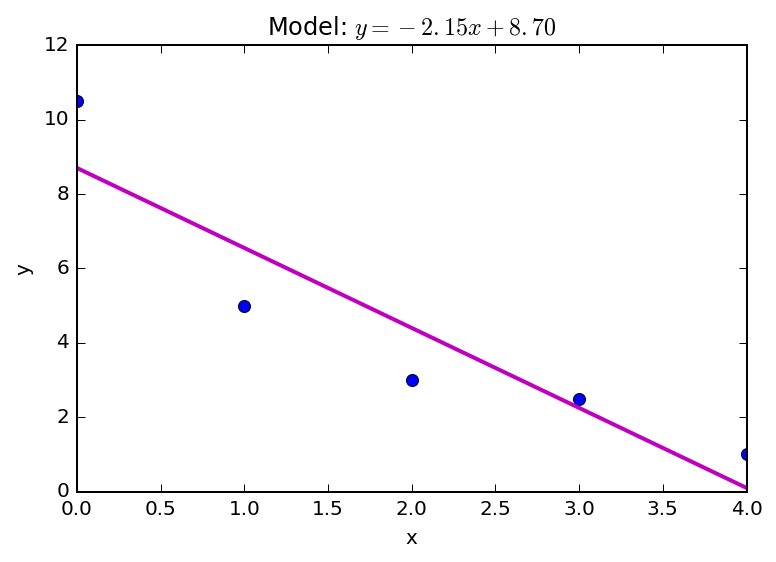

In [10]:
plt.plot(X_bias[:, 0], y, "o")
plt.plot(X_bias[:, 0], X_bias.dot(w), "m-", linewidth=2)
plt.xlabel("x"); plt.ylabel("y"); plt.title("Model: $y = %.2f x + %.2f$" % tuple(w));

We can now solve linear regression problems at will!

## Homework 1

Test the other forms of normal equations.

## Computational cost and complexity

Think of this problem:
* inputs: 100 images of size 256x256 pixels
* output: radius of the ball which is at the center of the image
* Is the direct solution via normal equations viable?

## Estimating problem tractability

In [21]:
n_pixels = 256 * 256
memory_size_xtx = n_pixels * n_pixels * 8
print("Required memory: %d GiB" % (memory_size_xtx / 2**30))

Required memory: 32 GiB


Inversion is an operation that requires $O(n^{2.373})$ operations ([Source](http://en.wikipedia.org/wiki/Computational_complexity_of_mathematical_operations)).

## (Stochastic) Gradient Descent

In cases where the training data set is very large or data is received in a stream, a direct solution using the normal equations may not be possible. An alternative approach is the **stochastic gradient descent** algorithm.

Iteratively update the weights using the gradient as reference.
<div class="container-fluid">
  <div class="row">
      <div class="col-md-3"><span/></div>
      <div class="col-md-6">
          <div class='well'>
              <img class='img-thumbnail' src='https://upload.wikimedia.org/wikipedia/commons/7/7a/Graph_of_sliding_derivative_line.gif'/>
          </div>
      </div>
      <div class="col-md-3" align='center'><span/></div>
  </div>
</div>

* $\Delta \boldsymbol{w}_t$ is minus the derivative of the error function $E(\boldsymbol{X}, \boldsymbol{y};\boldsymbol{w}_t)$ with respect to the weight $w_i$: 
$$\Delta w_i = - \frac{\partial E(\boldsymbol{X}, \boldsymbol{y};\boldsymbol{w})}{\partial w_i}$$

Update $\boldsymbol{w}$ incrementally in every iteration $t$ as:

$$\boldsymbol{w}(t+1) = \boldsymbol{w}(t) + \alpha \Delta \boldsymbol{w}(t),$$

where

* $\alpha$ is a hyperparameter called **learning rate**, it has to be set manually and must usually be within $(0, 1)$, typical values are 10e-1, 10e-2, 10e-3, ...

**Note:** Gradient descent actually is a more general rule that can be applied to any minimization problem if the gradient can be computed, e.g., for artificial neural networks, support vector machines, $k$-means, etc. (another forward pointer).

## Gradient of the Linear Model

Using as error function the sum of squared errors (SSE),

$$E(\boldsymbol{X}, \boldsymbol{y};\boldsymbol{w}) = \frac{1}{2}\left\|\boldsymbol{X} \cdot \boldsymbol{w} - \boldsymbol{y}\right\|^2_2$$

The gradient becomes
$$\nabla \boldsymbol{w} = \nabla_{\boldsymbol{w}} E(\boldsymbol{X}, \boldsymbol{y};\boldsymbol{w}) = \boldsymbol{X}^T \cdot (\boldsymbol{X} \cdot \boldsymbol{w} - \boldsymbol{y})$$

# Homework!

Implement the linear SSE gradient as the function

In [12]:
def linear_gradient_descent(X, y, w):
    pass

...and implement the learning loop.

See: Read Chapter 3 of Hastie, Tibshirani and Friedman (2009) [The Elements of Statistical Learning (2nd edition)](http://statweb.stanford.edu/~tibs/ElemStatLearn/) Springer-Verlag.

### Questions on the homework

* Why don't we always choose a very small learning rate?
* Your implementation of gradient descent oscillates between two error values. What could be the cause?

## Can we make linear models non-linear?

* Nonlinear projection of features (e.g. polynomial regression)
* Kernel trick (e.g. SVR, SVM, ...)
* Mixture of experts (e.g. locally weighted regression, locally weighted projection regression, Gaussian mixture regression, ...)
* Learn nonlinear features (e.g. artificial neural networks)

## Approximation of Nonlinear Functions (with a Linear Model)

* To approximate nonlinear funtions with a linear model, we have to generate **nonlinear features**. 

* In this example, we generate **sinusoidal** features. You could also try radial basis functions, polynomials, ...

* We expand each feature $x_j$ to the nonlinear feature vector $$\left\langle\cos(\frac{0}{d} \pi x_j), \cos(\frac{1}{d} \pi x_j), \ldots, \cos(\frac{d}{d} \pi x_j)\right\rangle^\intercal,$$ where $d$ is the number of basis functions. 

* Note that $\cos \left(\frac{0}{D} \pi x_j \right)=1$ is the bias we added manually in the previous example.

In [13]:
from itertools import chain

def sinusoidalize(X, n_degree):
    X_sinusoidal = np.ndarray((len(X), n_degree+1))
    for d in range(n_degree+1):
        X_sinusoidal[:, d] = np.cos(X[:, 0] * np.pi * d / n_degree)
    return X_sinusoidal

# Utility function
def build_sinusoidal(n_degree, w):
    return ((("%+.2f \sin(%d /" + str(n_degree) + " \pi x)") * (n_degree+1)) % tuple(chain(*zip(w, range(n_degree+1)))))

n_degree = 4
X_sinusoidal = sinusoidalize(X, n_degree=n_degree)
X_test_sinusoidal = sinusoidalize(X_test, n_degree=n_degree)
w_sin = normal_equations(X_sinusoidal, y)

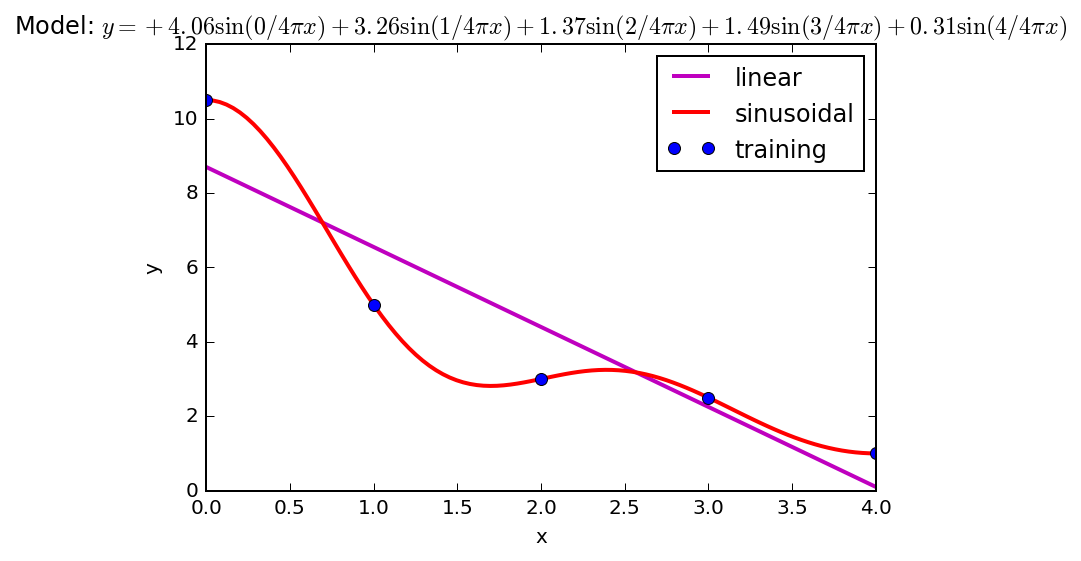

In [14]:
plt.plot(X_bias[:, 0], X_bias.dot(w), "m-", linewidth=2, label='linear')
plt.plot(X_test_bias[:, 0], X_test_sinusoidal.dot(w_sin), "-", linewidth=2, color="r", label='sinusoidal')
plt.plot(X_bias[:, 0], y, "bo", label='training')
plt.xlabel("x"); plt.ylabel("y"); plt.legend()
plt.title("Model: $y = " + build_sinusoidal(n_degree, w_sin) + "$");

You might be wondering, is this cheating? 
* I am hand-picking basis functions.
* This approach has little applicability in real-world practice but...
* hints us towards an interesting direction.

## How can we make a model more general?

* **Get more training data.**
* Generate artificial training data:
    * Add noise to your training data
    * Example for object recognition: scale, rotate, distort images, select random samples from a bigger image, corrupt image, ...
* Prefer simple models (e.g. degree of polynomial)
* Penalize large weights, for example
    * quadratic values of weights
    * absolute values of weights
    * ...
* Average **different** models (ensemble methods)

## Over and Under Fitting
Techniques used to account for over fitting or under fitting a given model when using a maximum likelihood approach.

### Regularized Least Squares
* Regularization attempts to address the problem of overfitting a given model to the training data and/or eliminating parameters that are not important based on the data. 
* The general total error function with a **regularization term** is given by
$$E_D(\vec{w}) + \lambda E_W(\vec{w})$$
where $\lambda$ is the regularization coefficient and $E_W$ is the regularization term.

A commonly used regularization term is the sum-of-squares of the model parameters,
    $$E_W(\vec{w}) = \frac1{2}\vec{w}^\intercal\vec{w}$$
known as the **weight decay** regularizer. 

This regularization terms leads to the optimal solution, assuming a linear regression model with Gaussian noise on the training data, of $$\vec{w} = \left(\lambda \vec{I} + \vec{\Phi}^\intercal \vec{\Phi}\right)^{-1} \vec{\Phi}^T\vec{y}$$

In [15]:
def y(x,m,b,mu=0,sigma=1): 
    return m*x + b + np.random.normal(mu,sigma,1)[0]

def el_pow(x,pow):
    temp = x
    for i in range(pow-1):
        temp = temp * x
    return temp

def prediction(params, x):
    pred = 0
    for i in range(len(params)):
        pred += params[i]*math.pow(x,i)
    return pred

In [16]:
#training data, with N data points
N = 101
M = 8
t = np.empty(N)
domain = np.empty(N)
domain_bound = 1.0/N
for i in range(N): 
    domain[i] = i*domain_bound
for i in range(N): 
    t[i] = y(x=domain[i],m=4.89,b=0.57)
#find the solution without using regularization
#design matrix, phi, N X M
phi = np.array([np.ones(N), domain, el_pow(domain,2), el_pow(domain,3),
                el_pow(domain,4), el_pow(domain,5), el_pow(domain,6),el_pow(domain,7)]).T
temp1 = np.linalg.inv(np.dot(phi.T,phi)) #inverse of phi.T X phi
temp2 = np.dot(temp1, phi.T)
w1 = np.dot(temp2,t) #solution
predicted_t = [prediction(w1,x) for x in domain]
print('w1=',w1)

w1= [    1.65    -12.386   152.416  -618.992  1189.687 -1049.657   310.822    33.286]


In [17]:
#find the regularized solution
lam = 0.1
temp1 = np.linalg.inv(lam*np.eye(M)+np.dot(phi.T,phi))
temp2 = np.dot(temp1,phi.T)
w2 = np.dot(temp2,t)
print('w2=',w2)
predicted_t_reg = [prediction(w2,x) for x in domain]

w2= [ 1.313  2.673  1.053 -0.035 -0.344 -0.15   0.337  0.979]


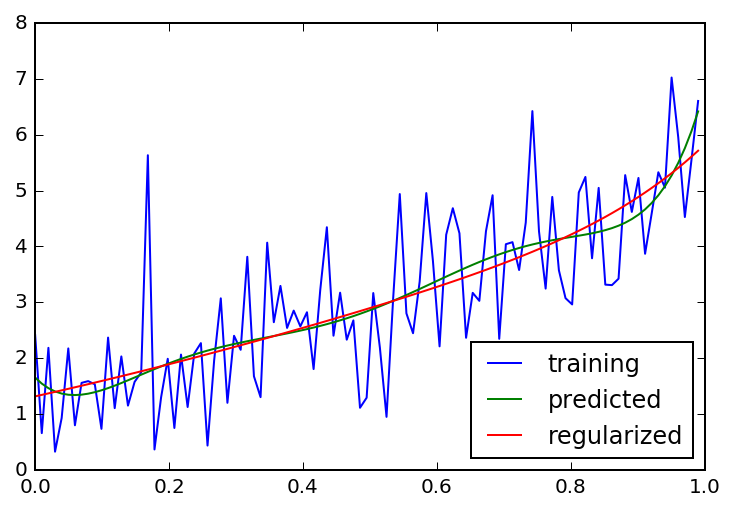

In [18]:
plt.plot(domain,t, label='training')
plt.plot(domain,predicted_t, label='predicted')
plt.plot(domain,predicted_t_reg, label='regularized')
plt.legend(loc='lower right');

# Final remarks

* We now have a tool for solving regression problems.
* ...but the world is highly non-linear 😱.
* Gradient descent is applicable in cases where the loss function is differenciable with respect to the parameters.
* We saw regularization in action for the first time.
* Read Chapter 3 of Hastie, Tibshirani and Friedman (2009) [The Elements of Statistical Learning (2nd edition)](http://statweb.stanford.edu/~tibs/ElemStatLearn/) Springer-Verlag.

<hr/>
<div class="container-fluid">
  <div class='well'>
      <div class="row">
          <div class="col-md-3" align='center'>
              <img align='center'alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png"/>
          </div>
          <div class="col-md-9">
              This work is licensed under a [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-nc-sa/4.0/).
          </div>
      </div>
  </div>
</div>

In [19]:
%load_ext version_information
%version_information scipy, numpy, matplotlib

Software versions
Python 3.5.1 64bit [GCC 4.2.1 (Apple Inc. build 5577)]
IPython 4.1.2
OS Darwin 15.4.0 x86_64 i386 64bit
scipy 0.17.0
numpy 1.10.4
matplotlib 1.5.1
Mon Mar 28 10:45:53 2016 BRT

In [20]:
# this code is here only for cosmetic reasons
from IPython.core.display import HTML
def css_styling():
    return HTML(open('custom/custom.include', 'r').read())
css_styling()